# Visualization of K-Means applied on raw pixels

In [5]:
import cv2 as cv
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
import src
from src.data_generation.utils import downsample_img
from src.hierarchical_properties.k_means import k_means_on_img
import importlib

importlib.reload(src.hierarchical_properties.k_means)
from src.hierarchical_properties.k_means import k_means_on_img

In [7]:
# Constants
img_path = r"C:\Users\lucam\OneDrive\Documenti\KTH\2nd_year\P1\Adv DL\Project\DD2412project\data\img_trial\abc.png"

full_size = 448
patch_size = 14

# K-Means
k = 2
max_iter = 100
epsilon = 0.2
attempts = 10
normalize = True

weight_original_img = 0.1
weight_colored_patch = 1.0
gamma = 0

In [8]:
img = cv.imread(img_path)

img = downsample_img(img, full_size, full_size, False)

In [9]:
"""
def k_means_on_img(image, k, max_iter=100, epsilon=0.2, attempts=10, normalize=False, plot=False):
    flag = cv.KMEANS_RANDOM_CENTERS
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, max_iter, epsilon)

    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    if plot:
        # show the image
        plt.imshow(image)
        plt.show()

    if normalize:
        # normalize img to 0-255
        norm_image = cv.normalize(image, None, alpha = 0, beta = 255, norm_type = cv.NORM_MINMAX, dtype = cv.CV_32F)

        image = norm_image.astype(np.uint8)

    # reshape the image to a 2D array of pixels and 3 color values (RGB)
    pixel_values = image.reshape((-1, 3))
    # convert to float
    pixel_values = np.float32(pixel_values)

    k = k
    # some documentation -> https://docs.opencv.org/4.x/d1/d5c/tutorial_py_kmeans_opencv.html
    attempts = attempts
    _, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, attempts, flag)

    # convert back to 8 bit values
    centers = np.uint8(centers)

    # flatten the labels array
    labels = labels.flatten()

    # convert all pixels to the color of the centroids
    segmented_image = centers[labels.flatten()]

    # reshape back to the original image dimension
    segmented_image = segmented_image.reshape(image.shape)
    if plot:
        # show the image
        plt.imshow(segmented_image)
        plt.show()
    return segmented_image
"""

'\ndef k_means_on_img(image, k, max_iter=100, epsilon=0.2, attempts=10, normalize=False, plot=False):\n    flag = cv.KMEANS_RANDOM_CENTERS\n    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, max_iter, epsilon)\n\n    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)\n    if plot:\n        # show the image\n        plt.imshow(image)\n        plt.show()\n\n    if normalize:\n        # normalize img to 0-255\n        norm_image = cv.normalize(image, None, alpha = 0, beta = 255, norm_type = cv.NORM_MINMAX, dtype = cv.CV_32F)\n\n        image = norm_image.astype(np.uint8)\n\n    # reshape the image to a 2D array of pixels and 3 color values (RGB)\n    pixel_values = image.reshape((-1, 3))\n    # convert to float\n    pixel_values = np.float32(pixel_values)\n\n    k = k\n    # some documentation -> https://docs.opencv.org/4.x/d1/d5c/tutorial_py_kmeans_opencv.html\n    attempts = attempts\n    _, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, attempts, flag)\n\n    #

In [10]:
#seg_img = k_means_on_img(img, k=k, max_iter=max_iter, epsilon=epsilon, attempts=attempts, normalize=normalize, plot=True)

## Extraction of the patch from the original image

In [11]:
patch = downsample_img(img, patch_size, patch_size, False)

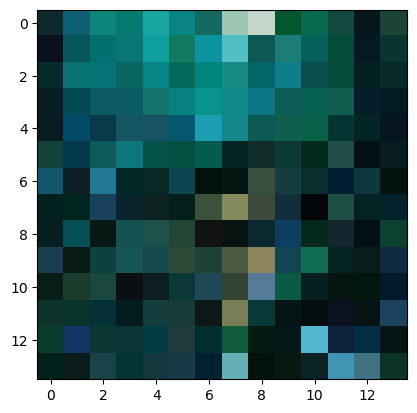

In [12]:
plt.imshow(patch)
plt.show()

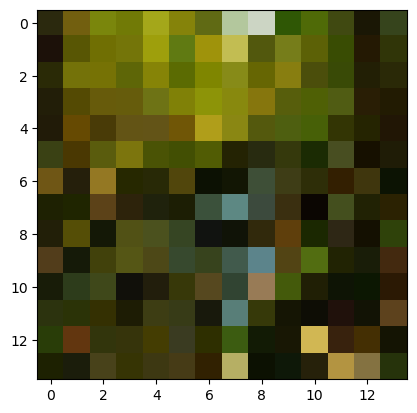

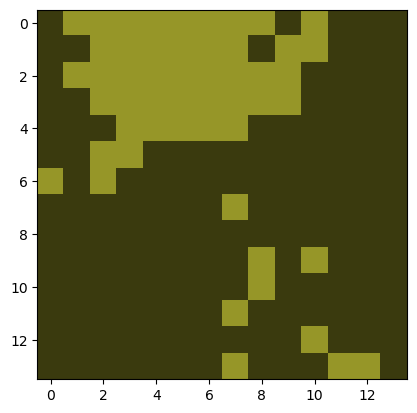

In [13]:
seg_patch = k_means_on_img(patch, k=k, max_iter=max_iter, epsilon=epsilon, attempts=attempts, normalize=normalize, plot=True)

In [14]:
seg_patch

array([[[ 58,  58,  14],
        [150, 150,  40],
        [150, 150,  40],
        [150, 150,  40],
        [150, 150,  40],
        [150, 150,  40],
        [150, 150,  40],
        [150, 150,  40],
        [150, 150,  40],
        [ 58,  58,  14],
        [150, 150,  40],
        [ 58,  58,  14],
        [ 58,  58,  14],
        [ 58,  58,  14]],

       [[ 58,  58,  14],
        [ 58,  58,  14],
        [150, 150,  40],
        [150, 150,  40],
        [150, 150,  40],
        [150, 150,  40],
        [150, 150,  40],
        [150, 150,  40],
        [ 58,  58,  14],
        [150, 150,  40],
        [150, 150,  40],
        [ 58,  58,  14],
        [ 58,  58,  14],
        [ 58,  58,  14]],

       [[ 58,  58,  14],
        [150, 150,  40],
        [150, 150,  40],
        [150, 150,  40],
        [150, 150,  40],
        [150, 150,  40],
        [150, 150,  40],
        [150, 150,  40],
        [150, 150,  40],
        [150, 150,  40],
        [ 58,  58,  14],
        [ 58,  58,  1

## Bilinear Interpolation

In [15]:
seg_full = downsample_img(seg_patch, full_size, full_size, False)

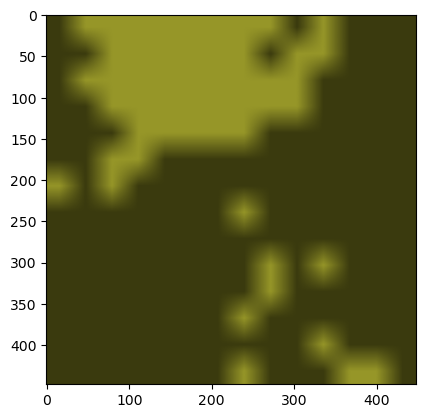

In [16]:
plt.imshow(seg_full)
plt.show()

In [17]:
# Convert the original image as grayscale image to put it in the background
# to be able to put the patch (the output of Kmeans) over it in a transparent
# way.
# Single channel grayscale image
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# Repeat the grayscale image along all the 3 channels
stacked_img = np.stack((img_gray, ) * 3, axis=-1)

In [18]:
final_img = cv.addWeighted(stacked_img, weight_original_img, seg_full, weight_colored_patch, gamma)

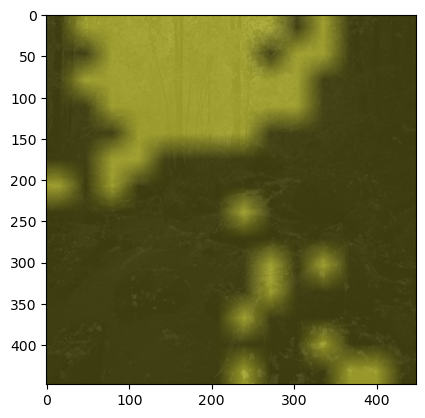

In [19]:
plt.imshow(final_img)
plt.show()

## Nearest Neighbors Interpolation

In [20]:
seg_full_nearest_neighbor_interp = downsample_img(
    seg_patch, full_size, full_size, False,
    interpolation_method=cv.INTER_NEAREST)

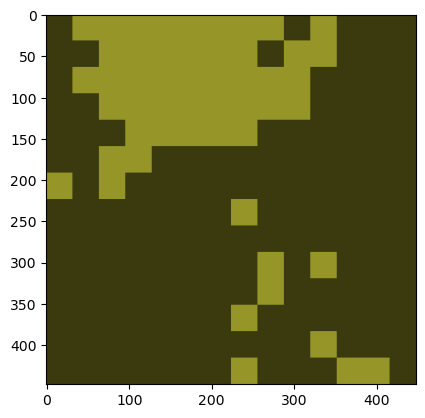

In [21]:
plt.imshow(seg_full_nearest_neighbor_interp)
plt.show()

In [22]:
nearest_neighbor_interp_final_img = cv.addWeighted(
    stacked_img, weight_original_img,
    seg_full_nearest_neighbor_interp,
    weight_colored_patch, gamma)

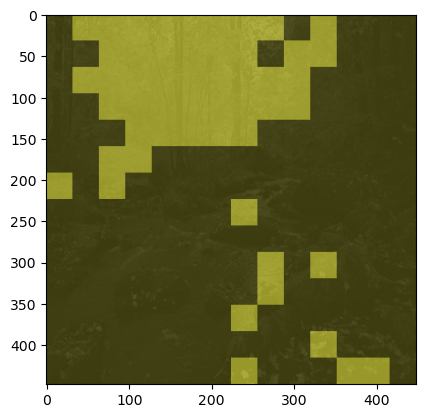

In [23]:
plt.imshow(nearest_neighbor_interp_final_img)
plt.show()